In [25]:
import pandas as pd

weather = pd.read_csv("Weather.csv", index_col="DATE")


In [27]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.509539
ACSH       0.509488
AWND       0.260967
FMTM       0.483575
PGTM       0.374158
PRCP       0.000051
SNOW       0.000051
SNWD       0.000153
TAVG       0.669404
TMAX       0.000051
TMIN       0.000051
TSUN       0.998419
WDF1       0.509743
WDF2       0.490614
WDF5       0.494848
WDFG       0.738778
WDFM       0.999949
WESD       0.690318
WSF1       0.509590
WSF2       0.490614
WSF5       0.494899
WSFG       0.619312
WSFM       0.999949
WT01       0.629820
WT02       0.935115
WT03       0.932871
WT04       0.982504
WT05       0.981432
WT06       0.990767
WT07       0.994491
WT08       0.798919
WT09       0.992859
WT11       0.999286
WT13       0.888543
WT14       0.954754
WT15       0.997858
WT16       0.664507
WT17       0.996939
WT18       0.940471
WT19       0.999949
WT21       0.999745
WT22       0.997501
WV01       0.999949
dtype: float64

In [28]:
valid_columns = weather.columns[null_pct < .05]

In [29]:
valid_columns 

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [30]:
weather = weather.ffill()

In [33]:
weather = weather[valid_columns].copy()
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0
...,...,...,...,...,...,...,...
2023-08-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.13,0.0,0.0,85.0,68.0
2023-08-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77.0,63.0
2023-09-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,76.0,59.0


In [34]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()


STATION    0
NAME       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
dtype: int64

In [35]:
weather.dtypes

STATION     object
NAME        object
PRCP       float64
SNOW       float64
SNWD       float64
TMAX       float64
TMIN       float64
dtype: object

In [36]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29',
       '2023-08-30', '2023-08-31', '2023-09-01', '2023-09-02', '2023-09-03'],
      dtype='object', name='DATE', length=19604)

In [37]:
weather.index = pd.to_datetime(weather.index)

In [38]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-02', '2023-09-03'],
              dtype='datetime64[ns]', name='DATE', length=19604, freq=None)

In [40]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    246
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

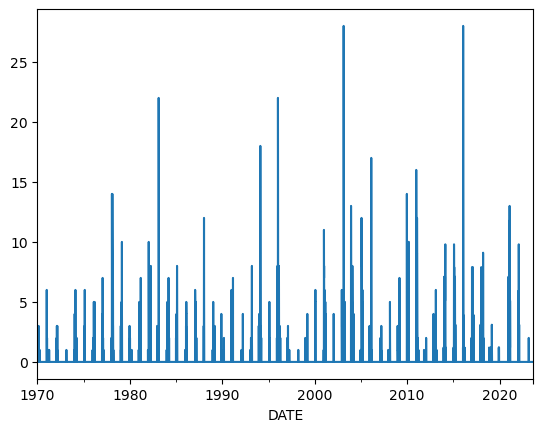

In [42]:
weather["SNWD"].plot()

In [43]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0
...,...,...,...,...,...,...,...
2023-08-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.13,0.0,0.0,85.0,68.0
2023-08-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77.0,63.0
2023-09-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,76.0,59.0


In [47]:
weather["TARGET"] = weather.shift(-1)["TMAX"]

In [48]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TARGET
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0,36.0
...,...,...,...,...,...,...,...,...
2023-08-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.13,0.0,0.0,85.0,68.0,77.0
2023-08-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77.0,63.0,76.0
2023-09-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,76.0,59.0,75.0


In [50]:
weather = weather.ffill()

In [51]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TARGET
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0,36.0
...,...,...,...,...,...,...,...,...
2023-08-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.13,0.0,0.0,85.0,68.0,77.0
2023-08-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77.0,63.0,76.0
2023-09-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,76.0,59.0,75.0


In [54]:
from sklearn.linear_model import Ridge 


rr = Ridge(alpha=.1)

In [55]:
predict = weather.columns[~weather.columns.isin(["TARGET","NAME","STATION"])]

In [56]:
predict

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [57]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["TARGET"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["TARGET"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [59]:
predection = backtest(weather , rr , predict )
predection

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2023-08-30,77.0,82.781569,5.781569
2023-08-31,76.0,76.775927,0.775927
2023-09-01,75.0,74.262328,0.737672


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predection["actual"], predection["prediction"])

5.139072008230447

In [68]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP"]:
        weather = compute_rolling(weather, horizon, col)

In [69]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["TMAX", "TMIN", "PRCP"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [70]:
weather  

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TARGET,rolling_3_TMAX,rolling_3_TMAX_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0,31.0,NaN,NaN,...,NaN,NaN,NaN,NaN,28.000000,28.000000,22.000000,22.000000,0.000000,0.000000
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0,38.0,NaN,NaN,...,NaN,NaN,NaN,NaN,29.500000,31.000000,22.000000,22.000000,0.000000,0.000000
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0,31.0,32.333333,0.175258,...,NaN,NaN,NaN,NaN,32.333333,38.000000,23.000000,25.000000,0.006667,0.020000
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0,35.0,33.333333,-0.070000,...,NaN,NaN,NaN,NaN,32.000000,31.000000,23.000000,23.000000,0.005000,0.000000
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0,36.0,34.666667,0.009615,...,NaN,NaN,NaN,NaN,32.600000,35.000000,22.600000,21.000000,0.004000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.13,0.0,0.0,85.0,68.0,77.0,80.000000,0.062500,...,67.214286,0.011690,0.070000,0.857143,82.473401,82.370370,68.233114,67.407407,0.124029,0.016667
2023-08-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77.0,63.0,76.0,81.000000,-0.049383,...,66.642857,-0.054662,0.070000,-1.000000,82.470131,80.574074,68.229988,66.648148,0.123955,0.030185
2023-09-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,76.0,59.0,75.0,79.333333,-0.042017,...,66.000000,-0.106061,0.047857,-1.000000,75.797612,79.944444,61.208674,65.111111,0.115487,0.100556


In [72]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TARGET,rolling_3_TMAX,rolling_3_TMAX_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49.0,40.0,47.0,41.666667,0.176000,...,22.285714,0.794872,0.017143,-1.000000,31.965517,49.000000,20.620690,40.000000,0.019310,0.000000
1970-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47.0,24.0,36.0,45.333333,0.036765,...,22.500000,0.066667,0.017143,-1.000000,32.466667,47.000000,20.733333,24.000000,0.018667,0.000000
1970-01-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36.0,22.0,48.0,44.000000,-0.181818,...,21.928571,0.003257,0.015714,-1.000000,32.580645,36.000000,20.774194,22.000000,0.018065,0.000000
1970-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48.0,34.0,49.0,43.666667,0.099237,...,22.571429,0.506329,0.008571,-1.000000,48.000000,48.000000,34.000000,34.000000,0.000000,0.000000
1970-02-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.11,0.0,0.0,49.0,36.0,50.0,44.333333,0.105263,...,24.000000,0.500000,0.016429,5.695652,48.500000,49.000000,35.000000,36.000000,0.055000,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.13,0.0,0.0,85.0,68.0,77.0,80.000000,0.062500,...,67.214286,0.011690,0.070000,0.857143,82.473401,82.370370,68.233114,67.407407,0.124029,0.016667
2023-08-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77.0,63.0,76.0,81.000000,-0.049383,...,66.642857,-0.054662,0.070000,-1.000000,82.470131,80.574074,68.229988,66.648148,0.123955,0.030185
2023-09-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,76.0,59.0,75.0,79.333333,-0.042017,...,66.000000,-0.106061,0.047857,-1.000000,75.797612,79.944444,61.208674,65.111111,0.115487,0.100556


In [73]:
predictors = weather.columns[~weather.columns.isin(["TARGET", "NAME", "STATION"])]


In [74]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.789434029206895

In [75]:
mean_squared_error(predictions["actual"], predictions["prediction"])


37.51444086586703

In [76]:
predictions.sort_values("diff", ascending=False)


,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.381862,30.618138
2007-03-26,78.0,49.984630,28.015370
1998-03-26,80.0,52.010811,27.989189
2003-04-15,86.0,59.401504,26.598496
1985-04-18,84.0,58.431922,25.568078
...,...,...,...
1998-08-09,84.0,83.996775,0.003225
1990-11-04,65.0,65.002483,0.002483
2018-12-25,44.0,43.998056,0.001944


<AxesSubplot:>

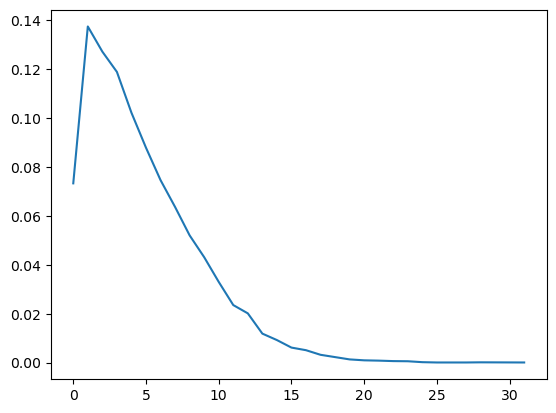

In [77]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()
